# Student name: Sajin Mohamed Pallikkathodi Erathali

# Student ID: 23037601

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
import pandas as pd

# Task 1a

These functions are provided to assist you in Task 1a

In [38]:
training_data_path = 'Et2_Classification_TrainingData.csv'
test_data_path = 'Et2_Classification_TestData.csv'

training_data = pd.read_csv(training_data_path)
test_data = pd.read_csv(test_data_path)
training_data.columns = ['feature1', 'feature2', 'label']
test_data.columns = ['feature1', 'feature2', 'label']
X_train = training_data[['feature1', 'feature2']]
y_train = training_data['label']
X_test = test_data[['feature1', 'feature2']]
y_test = test_data['label']

#Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Predict
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : ", accuracy)

Accuracy :  0.41379310344827586


In [3]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [4]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

Please add cells according to your own requirements.

Ein:  0.5285714285714286
Eout:  0.6333333333333333
Accuracy:  0.36666666666666664


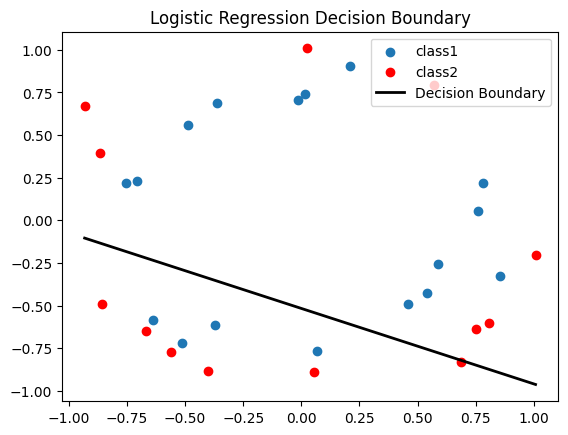

In [34]:

# get the training data
df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)


# using Logistic Regression
clf = LogisticRegression()
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# fit the model
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
train_accuracy = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy)
print("Eout: ", 1 - accuracy)
print("Accuracy: ", accuracy)

# plot the data points as class 1 and class 2
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2")


weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()
# get the two points on the decision boundary using the weights generated and the decision boundary function provided
boundary_points = decision_boundary(weights, x_min, x_max)

plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title("Logistic Regression Decision Boundary")
plt.legend(loc='upper right')


<span style = "color:green">The above plot indicates that the decision boundary drawn using the weights identified by the Logistic Regression is not ideal for classification of this data, as the decision boundary only classifies 36.6% of the data accurately. Here we have the Eout as 63.3%. By looking at the data we can see that the test data cannot be classified using a linear boundary. Hence we need to transform this data into another space for it to be classified with a binary classifier. Looking at the data we see a pattern that tells us that squaring the input values might be helpful in approximating the target function</span>

Ein:  0.5
Eout:  0.5333333333333333
Accuracy:  0.4666666666666667


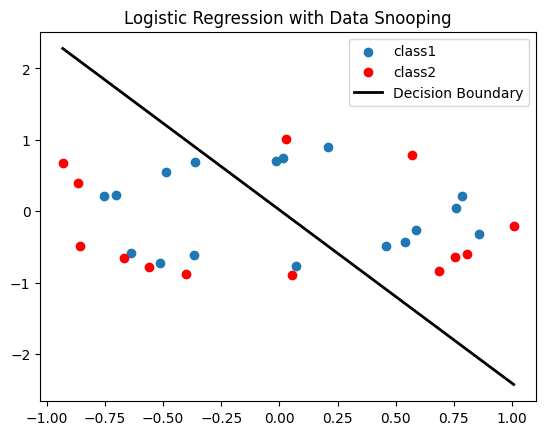

In [26]:


df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)

# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

# using Logistic Regression
clf = LogisticRegression()
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]


# snooping the data for X_train from X_test by taking 30 values
X_test_sample = X_test.sample(n=30, random_state=1)
X_train = pd.concat([X_train, X_test_sample]).reset_index(drop=True)

# snooping the data for y_train from y_test by taking 30 values
y_test_sample = y_test.sample(n=30, random_state=1)
y_train = pd.concat([y_train, y_test_sample]).reset_index(drop=True)

# fit the model
clf = clf.fit(X_train,y_train)

# get the test data
X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)
print("Accuracy: ", accuracy_score) # note here the accuracy is higher than the previous one due to the snooping done

# plot the data points as class 1 and class 2
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2")


weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()
boundary_points = decision_boundary(weights, x_min, x_max)

# get the two points on the decision boundary using the weights generated and the decision boundary function provided
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title("Logistic Regression with Data Snooping")
plt.legend(loc='upper right')


<span style="color:green">In the example above we used the Logistic Regression, however we did snoop into the test set to see what 20 of the records are and used that in the training of the classifier. As a result we can see the Eout decreasing to 53% from the 63% without snooping and the Accuracy increasing to 46% from 36% . This is a clear demonstration of data snooping</span>

### Approximation by squaring the input features

Accuracy:  0.5666666666666667
Ein:  0.08571428571428574
Eout:  0.43333333333333335


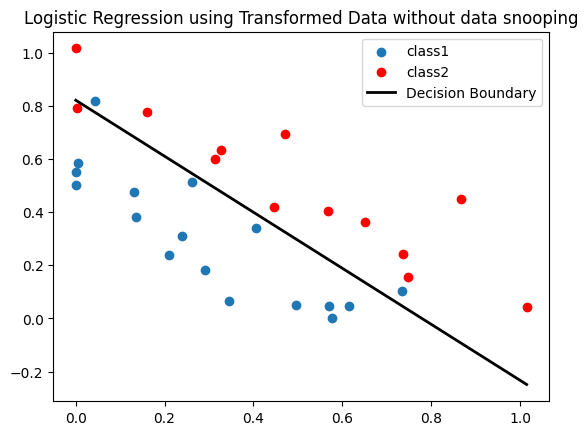

In [39]:

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data


# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]
X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# Transforming the data to order of 2
X_train = X_train.applymap(lambda x: x**2)
# fit the model
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


# Transforming the data to order of 2
X_test = X_test.applymap(lambda x: x**2)

# get the accuracy score
accuracy_score = accuracy_score(y_pred,y_test)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data without data snooping')
plt.legend()


<span style = "color:green">Applying a non-linear transformation(transforming the data using a square function) on the train and test data improves the accuracy score of the Logistic Regression when applied. The accuracy score illustrates that the model is 90% accurate for the test data. ie 90% of the data are classified correctly and the Eout decreased to 9.9%. This can be observed from the graph above. This illustrates that for this hypothesis, the model closely approximates to the target function. This proves that, the data provided has circular pattern, and the square function applied to it would be best fit the approximation. </span>

Accuracy:  0.9
Ein:  0.07499999999999996
Eout:  0.09999999999999998


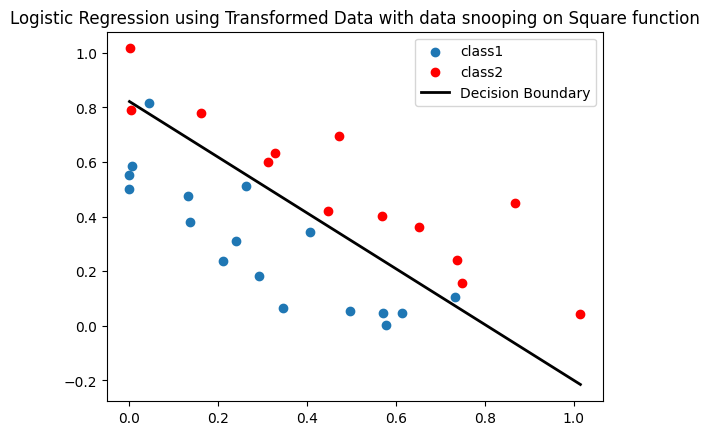

In [62]:

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]
X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# snooping the data for X_train from X_test by taking 10 values
X_test_sample = X_test.sample(n=10, random_state=1)
X_train = pd.concat([X_train, X_test_sample]).reset_index(drop=True)

# snooping the data for y_train from y_test by taking 10 values
y_test_sample = y_test.sample(n=10, random_state=1)
y_train = pd.concat([y_train, y_test_sample]).reset_index(drop=True)
# Transforming the data to order of 2
X_train = X_train.applymap(lambda x: x**2)
# fit the model
clf = clf.fit(X_train,y_train)


# Transforming the data to order of 2
X_test = X_test.applymap(lambda x: x**2)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data with data snooping on Square function')
plt.legend()


### Approximation by cubing input features

Ein:  0.5857142857142856
Eout:  0.7666666666666666
Accuracy:  0.23333333333333334


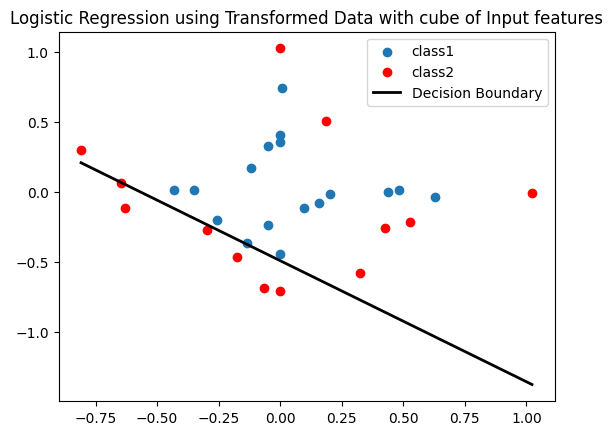

In [44]:

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]
X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# Transforming the data to order of 3
X_train = X_train.applymap(lambda x: x**3)
# fit the model
clf = clf.fit(X_train,y_train)




# Transforming the data to order of 3
X_test = X_test.applymap(lambda x: x**3)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data with cube of Input features')
plt.legend()


<span style = "color:green"> Here the accuracy score decreases to 23%. This tells us that the model is not a good fit for generalization as it only maps 23% of the data correctly. This can be viewed from the plot above.<span>

## Power of 4

Ein:  0.09999999999999998
Eout:  0.19999999999999996
Accuracy:  0.8


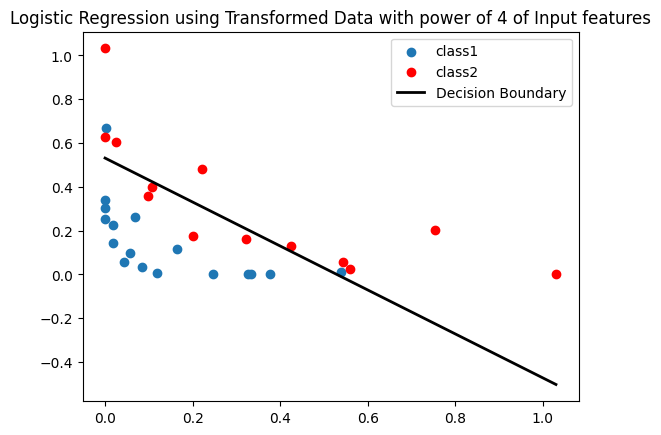

In [63]:

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]
X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# Transforming the data to order of 4
X_train = X_train.applymap(lambda x: x**4)
# fit the model
clf = clf.fit(X_train,y_train)



# Transforming the data to order of 4
X_test = X_test.applymap(lambda x: x**4)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data with power of 4 of Input features')
plt.legend()


<span style="color:green"> Here the accuracy is 80%. This again proves that the square transformation(power of 2) has more accuracy as the power 4 demonstrates a similar pattern with the given data. The Eout is 19%, which is considerably higher than the Eout of the square transformation</span>

### Power of 9

Ein:  0.5714285714285714
Eout:  0.6333333333333333
Accuracy:  0.36666666666666664


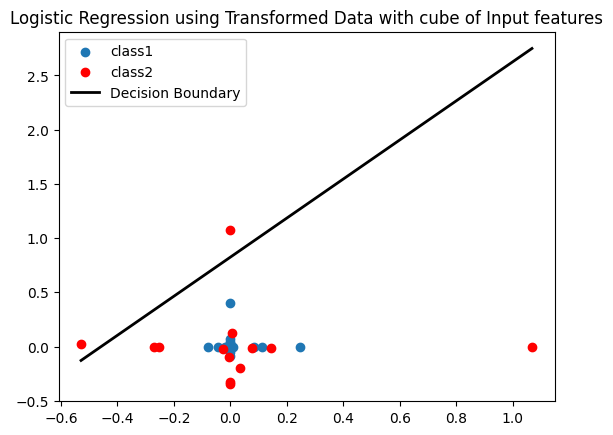

In [45]:

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]
X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# Transforming the data to order of 9
X_train = X_train.applymap(lambda x: x**9)
# fit the model
clf = clf.fit(X_train,y_train)

# Transforming the data to order of 9
X_test = X_test.applymap(lambda x: x**9)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data with cube of Input features')
plt.legend()



<span style="color: green"> The power of 9 does not seem to be better than without any transformation based on the accuracy value.</span>

### Approximation by using log function on input features

Ein:  0.4714285714285714
Eout:  0.5666666666666667
Accuracy:  0.43333333333333335


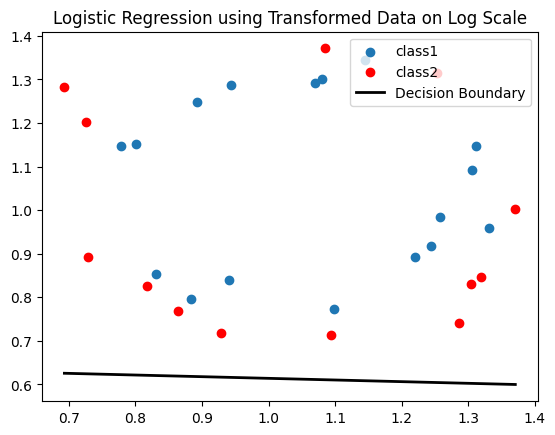

In [46]:

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# Transforming the data on log scale
X_train_shifted = X_train - X_train.min().min() + 1 # so that all values are positive since negative values are not allowed in log
X_train = X_train_shifted.applymap(lambda x: np.log(x+1))
# fit the model
clf = clf.fit(X_train,y_train)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

X_test_shifted = X_test - X_test.min().min() + 1
X_test = X_test_shifted.applymap(lambda x: np.log(x+1))

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2")
print("Accuracy: ", accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data on Log Scale')
plt.legend(loc='upper right')

<span style="color:green">Here we see an accuracy score of 43%. This illustrates its a better model when compared to the cubing model created above. However, as can be seen the classifier boundary is incorrectly drawn. I assume the 43% is due to the fact that all points belonging to class 2(red points) are above the decision boundary, as for the square model we see this is the desired output.</span>

### Approximation using square root

Ein:  0.4714285714285714
Eout:  0.6
Accuracy:  0.4


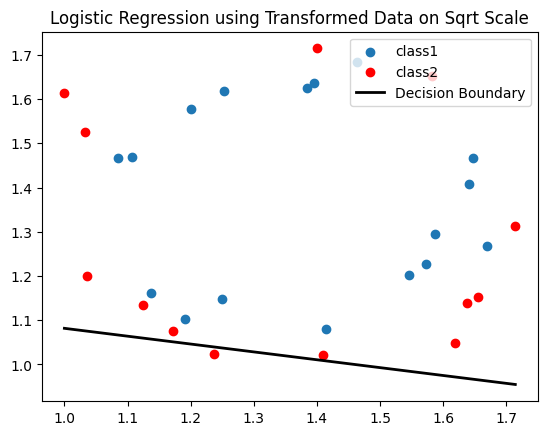

In [285]:

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# Transforming the data on sqrt
X_train = X_train_shifted.applymap(lambda x: np.sqrt(x))
# fit the model
clf = clf.fit(X_train,y_train)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]
# Transforming test data on sqrt
X_test = X_test_shifted.applymap(lambda x: np.sqrt(x))


# get the accuracy score
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2")
print("Accuracy: ", accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()


# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data on Sqrt Scale')
plt.legend(loc='upper right')


<span style = "color:green">Here the accuracy score is 40%. This is also not a good fit for the test data.</span>

## Reflection

After engaging with your peers, reflect on this task and answer the following questions: 
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

Your reflection..  

How do the found values for Ein and Eout for the various models relate to model complexity?
<span style = "color:green">When the given data was fitted with Logistic Regression we observed and </span>

Ein:0.5285714285714286 and   
Eout:  0.6333333333333333.  
  
<span style = "color:green">These Ein and Eout are high. This tells us that the model is a high biased model with a low complexity value. Looking at the plot, we clearly see that the regression line fails to capture the relationship to apply classification to the data. Also we observe that the data points cannot be linearly seperated in this space. Hence we try to shift the data to a higher dimension, thereby adding more complexity and reducing the effect of bias, say, order 2,3,4, log etc. and observe that the data points do very well generalize on the order 2 polynomial hypothesis, as the Accuracy increased to 90% with</span>
  
Ein:  0.08571428571428574 and   
Eout:  0.09999999999999998  
  
<span style = "color:green">This is done in accordance with the bias-variance tradeoff where increasing complexity leads to decrease in train and test error, to a valid limit.</span>

Explain how data transformations can lead to linear separability of a dataset.

<span style = "color:green">Data transformation helps us expose hidden patterns in a data set. In the above example, applying a second order function to transform the provided data set enabled the data to be linearly separated using a hyperplane that would not have been possible without the transformation. This can help capture non-linear relationships between input features thereby enabling an easy seperation of dataset using linear boundary. In the examples above I have applied the logarithmic and sqrt transformation apart from the polynomial transformations. However the best result was observed with a polynomial transformation with a power of 2. If we had more features we could have used PCA to identify and reduce the number of features</span>

Explain how data transformations effect the complexity of your model.

<span style = "color:green">Adding features and transforming the data can make the model more complex if there are a lot of features added and the method of creation of featueres is complex. This would lead to overfitting as it would lead to memorizing the training data thereby leading to poor generalization. However, carefully planned features which would help expose relevant information can help the model to learn as well.</span>


# Task 1b

In [17]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [16]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    # print("shape of X", X.shape)
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # print("shape of X", X.shape)
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [15]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [12]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

In [ ]:
error_in = []
error_out = []
repeats = 100
power_range = range(6, 10) # it is up to you to decide on a suitable range
data = pd.read_csv('Et2_Regression_Data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values
for power in power_range: 
    e_in=0
    e_out=0
    for r in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) ##Choose a suitable training_size XX
        X_train_trans = transPoly(X_train, power)
        X_test_trans = transPoly(X_test, power)
        w = weights(X_train_trans,y_train)
        e_in += calc_error(w,X_train_trans,y_train)
        e_out+= calc_error(w,X_test_trans,y_test)
    error_in.append(e_in/repeats)
    error_out.append(e_out/repeats)

Please add cells according to your own requirements.

## Reflection
After engaging with your peers, reflect on this task and answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity? 

Your reflection..

# Task 2

Below is an implementation of linear regression with regularization

In [1]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion 
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

### Linear Regression without Regularization

In [2]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

### Load Data set

In [64]:
df = pd.read_csv('ET2_Regression_Data.csv',header=None)

X = df.iloc[:,0].values
y = df.iloc[:,1].values

X_trans = transPoly(X,50)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.5, random_state =5)

### Adding Eval

In [29]:
def calc_ein_eout_eval_weights(lambdas, X, y):
    ein=[]
    eout=[]
    # adding eval as eout will not be available for real data, hence the later evaluation will be done on validation set
    eval = []
    weights=[]
    X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.5, random_state =5)

    for l in lambdas: 
    # print(y_train.shape)   
        w = weights_reg(X_train,y_train,l)
        ein.append(calc_error(w,X_train,y_train))
        eval.append(calc_error(w,X_val,y_val))
        eout.append(calc_error(w,X_test,y_test))
        weights.append(w)
    return ein,eout,weights,eval

### Plot for Identifying Optimal Lambda based on minimum value of Eval

10


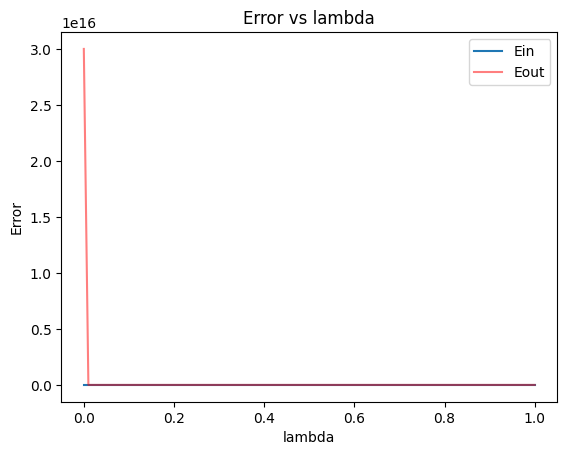

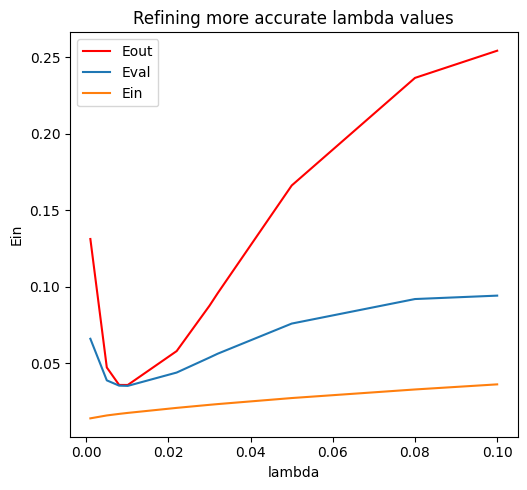

In [76]:

lambdas = np.linspace(0,1,100).tolist()
filtered_lambdas = [0.001, 0.005, 0.008, 0.01010, 0.022, 0.03, 0.032, 0.05, 0.08, 0.1]

ein, eout,weights, eval = calc_ein_eout_eval_weights(lambdas, X, y)
filtered_ein, filtered_eout,filtered_weights, filtered_eval = calc_ein_eout_eval_weights(filtered_lambdas, X, y)

plt.plot(lambdas,ein,  label='Ein')
plt.plot(lambdas,eout, 'r', label='Eout', alpha=0.5)
plt.xlabel('lambda')
plt.ylabel('Error')
plt.title("Error vs lambda")
plt.legend()

# since the values are not visible, we can filter the values and plot them again
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(filtered_lambdas,filtered_eout, 'r', label='Eout')
plt.xlabel('lambda')
plt.ylabel('Eout')
plt.legend()

print(len(filtered_eval))
plt.plot(filtered_lambdas, filtered_eval, label='Eval')
plt.xlabel('lambda')
plt.ylabel('Eval')
plt.legend()


plt.plot(filtered_lambdas ,filtered_ein, label='Ein') 
plt.xlabel('lambda')
plt.ylabel('Ein')
plt.legend()
   
plt.title("Refining more accurate lambda values")

plt.tight_layout()
plt.show()

<span style = "color:green">The above plots show us the optimal value of l would be when the lambda = 0.01. and underfitting would be more visible in the range less than 0.01 and over fitting visible over the range of 0.10</span>

### Finding Eval and Eout(for completion) at the optimal lambda

In [77]:
print("lambda without reguralization: ", lambdas[0])
print("Eval without regularization :", eval[0]) # since we start with 0 value for lambda ie. no regularization
print("Eout without regularization :", eout[0]) 
optimal_lambda_index = np.argmin(eval)  # finding optimal lambda where we have smallest eout
optimal_lambda = lambdas[optimal_lambda_index]
print("optimal lambda :", optimal_lambda)
print("Eval at optimal lambda: ", eout[optimal_lambda_index])
print("Eout at optimal lambda: ", eout[optimal_lambda_index])
print("\n")


lambda without reguralization:  0.0
Eval without regularization : 203353851890050.88
Eout without regularization : 3.0045724480710012e+16
optimal lambda : 0.010101010101010102
Eval at optimal lambda:  0.03589673524512362
Eout at optimal lambda:  0.03589673524512362




<span style = "color:green">noting here that Eval is equalent to Eout. This is good for later approximations</span>

### Plotting Underfitting, Optimal Model and Overfitting

lambda without reguralization:  0.0
Eval without regularization : 203353851890050.88
Eout without regularization : 3.0045724480710012e+16
optimal lambda : 0.009009009009009009
Eval at optimal lambda:  0.035271505299813266
Eout at optimal lambda:  0.035634752151987664




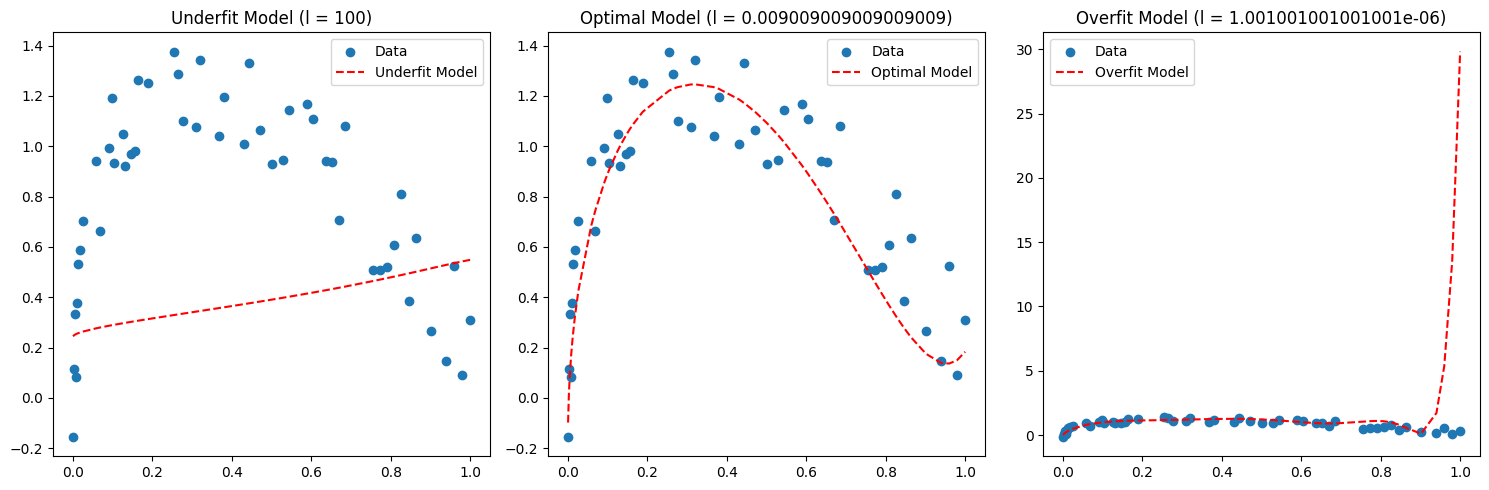

In [72]:

ein, eout,weights, eval = calc_ein_eout_eval_weights(lambdas, X, y)


print("lambda without reguralization: ", lambdas[0])
print("Eval without regularization :", eval[0]) # since we start with 0 value for lambda ie. no regularization
print("Eout without regularization :", eout[0]) # since we start with 0 value for lambda ie. no regularization
optimal_lambda_index = np.argmin(eval)  # finding optimal lambda where we have smallest eout
optimal_lambda = lambdas[optimal_lambda_index]
print("optimal lambda :", optimal_lambda)
print("Eval at optimal lambda: ", eval[optimal_lambda_index])
print("Eout at optimal lambda: ", eout[optimal_lambda_index])
print("\n")


fig, column = plt.subplots(1, 3, figsize=(15, 5)) # creating subplots with 3 columns
column[0].scatter(X_test[:, 1], y_test, label='Data')
column[1].scatter(X_test[:, 1], y_test, label='Data')
column[2].scatter(X_test[:, 1], y_test, label='Data')

lambda_overfit = 0.000001001001001001001
lambda_underfit = 100

weights_underfit = weights_reg(X_train, y_train, lambda_underfit)
weights_overfit = weights_reg(X_train, y_train, lambda_overfit)

x_range = np.linspace(X_train.min(), X_train.max(), 100) # creating a range of values for x-axis using the train values

y_pred_underfit = linreg_predict(weights_underfit, X_test) # predicting y values using underfit lambda
y_pred_optimal = linreg_predict(weights[optimal_lambda_index], X_test) # predicting y values using optimal lambda
y_pred_overfit = linreg_predict(weights_overfit, X_test) # predicting y values using overfit lambda


# Get the indices that would sort X_test
sort_indices = np.argsort(X_test[:, 1])

# Use these indices to sort X_test and y_pred values for a smoother graph
X_test_sorted = X_test[:, 1][sort_indices]
y_pred_optimal_sorted = y_pred_optimal[sort_indices]
y_pred_underfit_sorted = y_pred_underfit[sort_indices]
y_pred_overfit_sorted = y_pred_overfit[sort_indices]


# plotting the graphs for the three different values of lambda
column[0].plot(X_test_sorted, y_pred_underfit_sorted, 'r--', label='Underfit Model')
column[0].set_title(f'Underfit Model (l = {lambda_underfit})')
column[0].legend()

column[1].plot(X_test_sorted, y_pred_optimal_sorted, 'r--', label='Optimal Model')
column[1].set_title(f'Optimal Model (l = {optimal_lambda})')
column[1].legend()

column[2].plot(X_test_sorted, y_pred_overfit_sorted, 'r--', label='Overfit Model')
column[2].set_title(f'Overfit Model (l = {lambda_overfit})')
column[2].legend()


plt.tight_layout()
plt.show()


## Reflection

In your reflection, makes sure to answer the following questions:
- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

Interpret the information in the requested figures.  
### Underfit Model(l=100)
<span style="color:green">The above plots show the fitting various models trained on various weights. 
The first plot shows the underfitted model on the data set with a high lambda. As shown the model does not fit the data accurately. Here the chosen value for the regularization parameter is high(100). This results in a simple model and fails to capture the patterns in the data. This is due to the high penalty applied as the regularization parameter which penalizes the model highly due to which the model tends towards a simpler model, thus resulting in high bias</span>

### Optimal Model(l=0.009009009009009009)
<span style="color:green">The second plot shows the Optimal model fitted with the optimal lambda regularization. As illustrated the model fits perfectly with the data points without being sensitive to noise or outliers. Thus it does not overfit or underfit hence obtaining an optimal bias and variance.</span>

### Overfit Model(l = 1.00100e-06)
<span style="color:green">The third plot shows the data being fitted almost perfectly with the model with the overfitting. This is where the data fits too well. however as shown towards the right of the x-axis the plot of the model fits too well the outliers and the plot goes up towards the right. Here I had chosen a low value for the regularization penalty(lambda) which is why the model becomes too complex, due to weak regularization</span>

Explain the strategy chosen to decide on the optimum amount of regularisation.  
<span style="color:green">The optimum value for l was determined by looking at the eval generated(since that is the only data we have knowledge) and obtaining the l for which the out-of-sample error(eval) happens to be the minimum. Hence I observed the value of 0.009009009009009009 for l where minimum value of eval was observed</span>

Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.  

<span style="color:green">The term l*np.identity(m.shape[0]) adds regularization penalty while calculating the weights for the linear regression. The term creates an identity matrix with size equal to number of features in the data set(50) and multiplying the identity matrix by the lambda value creates the penalty value. This helps scale the result when added to the value of m. This addition is to ensure the matrix resulted would be invertible, hence it becomes applicable even to a singular matrix(a matrix with no inverse).</span>



# Task 3

Please add cells according to your own requirements.

### 10 Fold Cross Validation

Optimal Lambda:  0.002002002002002002
Eval at optimal lambda:  0.060910764348161874
Eout at optimal lambda:  0.13730706495017247


<Figure size 1000x600 with 0 Axes>

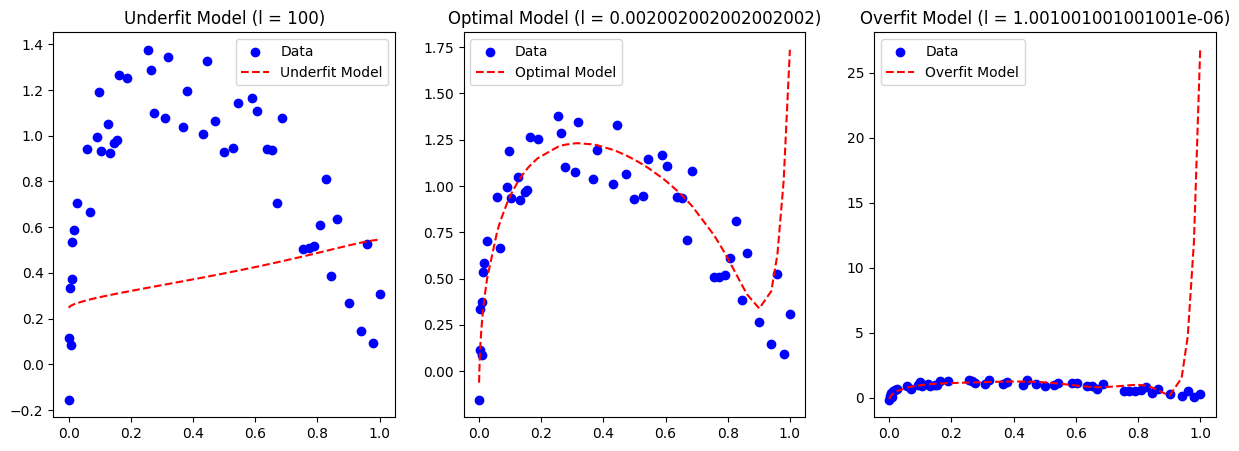

In [75]:
# applying k-fold cross validation with 10 splits, k=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up containers to keep track of average performance for each lambda
avg_evals = []
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(X_trans, y, train_size=0.5, random_state =5)

for index_train, index_val in kf.split(X_train_initial):
    X_train, X_val = X_train_initial[index_train], X_train_initial[index_val]
    y_train, y_val = y_train_initial[index_train], y_train_initial[index_val]
    # containers to keep track of performance for each lambda
    e_vals = []
    # Loop over lambdas
    lambdas = np.linspace(0, 1, 1000) # Choose a suitable range of lambdas here
    for l in lambdas:
        w = weights_reg(X_train, y_train, l)
        e_vals.append(calc_error(w, X_val, y_val))
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
        avg_evals.append(e_vals)


# Calculate average error for each lambda
avg_evals = np.mean(np.array(avg_evals), axis=0)

# Find the optimal lambda
optimal_lambda_index = np.argmin(avg_evals)
optimal_lambda = lambdas[optimal_lambda_index]
eout_optimal = eout[optimal_lambda_index]
eval_optimal = eval[optimal_lambda_index]
print("Optimal Lambda: ", optimal_lambda)
print("Eval at optimal lambda: ", eval_optimal)
print("Eout at optimal lambda: ", eout_optimal)

# define underfit and overfit lambdas
underfit_lambda = 100
overfit_lambda = 0.000001001001001001001

# Train using optimal lambda
optimal_weights = weights_reg(X_train_initial, y_train_initial, optimal_lambda)
underfit_weights = weights_reg(X_train_initial, y_train_initial, underfit_lambda)
overfit_weights = weights_reg(X_train_initial, y_train_initial, overfit_lambda)

plt.figure(figsize=(10, 6))

fig, column = plt.subplots(1, 3, figsize=(15, 5)) # creating subplots with 3 columns
# plot the data points
column[0].scatter(X_test[:, 1], y_test, color='blue', label='Data')
column[1].scatter(X_test[:, 1], y_test, color='blue', label='Data')
column[2].scatter(X_test[:, 1], y_test, color='blue', label='Data')


y_pred_optimal = linreg_predict(optimal_weights, X_test_initial) # predicting y values using optimal lambda
y_pred_underfit = linreg_predict(underfit_weights, X_test_initial) # predicting y values using underfit lambda
y_pred_overfit = linreg_predict(overfit_weights, X_test_initial) # predicting y values using overfit lambda

sort_indices = np.argsort(X_test[:, 1])
# Use these indices to sort X_test and y_pred_optimal
X_test_sorted = X_test[:, 1][sort_indices]
y_pred_optimal_sorted = y_pred_optimal[sort_indices]
y_pred_underfit_sorted = y_pred_underfit[sort_indices]
y_pred_overfit_sorted = y_pred_overfit[sort_indices]

# plotting the graphs for the three different values of lambda
column[0].plot(X_test_sorted, y_pred_underfit_sorted, 'r--', label='Underfit Model')
column[0].set_title(f'Underfit Model (l = {underfit_lambda})')
column[0].legend()


column[1].plot(X_test_sorted, y_pred_optimal_sorted, 'r--', label='Optimal Model')
column[1].set_title(f'Optimal Model (l = {optimal_lambda})')
column[1].legend()

column[2].plot(X_test_sorted, y_pred_overfit_sorted, 'r--', label='Overfit Model')
column[2].set_title(f'Overfit Model (l = {overfit_lambda})')
column[2].legend()

plt.legend()
plt.show()


<span style = "color:green">K-Fold Cross Validation provides a more generalized model and a more reliable measuse of performance by averaging the model's performance over K different subsets of the data. This helps reduce the variance measure of the model. This is a key in bias-variance tradeoff as higher K would lead to lower variance but would also produce higher bias. Hence, K = 10 provides a good bias-variance tradeoff.</span>

## Reflection
In your reflection, explain the procedure followed by using KFOLDS and your choice of parameters. 

<span style = "color:green">The K-Fold cross-validation applied here has 10 folds being used here.   
The train data is split into 10 folds and the model is trained on 9 of the 10 folds in a loop where we change the excluded fold each time.   
Hence the loop created at the beginning at line 8 would run 10 times, each time taking a different part of the 10 splits we did on the X_train(X_train_initial).  
In each of the 10 iterations I split the train data into validation and train(so as not to touch the test data) and for each lambda value I calculate the mean squared error and store it in the list eval.  
The optimal lambda value is taken from the list of lambdas based on the eval list having the lowest eval.  
This 10 fold cross validation is used to create a more accurate model by training and evaluating on multiple subsets of the training data, thereby reducing the risk of overfitting and underfitting, thus providing better generalization.  
The reason for using 10 folds is that it is a good balance between the computational cost and the variance of the estimate, as the variance of the estimate is reduced as the number of folds increases.  
As the numebr of folds increases, the computational cost increases as well, so 10 folds is a good balance between the two.</span>

# Task 4

### RidgeCV optimal lambda

In [85]:
alphas = np.linspace(0.000000000001, 1, 1000)

ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_train_initial, y_train_initial)
optimal_alpha_ridge = ridge.alpha_
optimal_weights_ridge = ridge.coef_
eout_optimal = ridge.score(X_test_initial, y_test_initial)
print("Optimal alpha with Ridge Regression: ", optimal_alpha_ridge)
print("Eout at optimal alpha with Ridge Regression: ", eout_optimal)

Optimal alpha with Ridge Regression:  0.012012012013000001
Eout at optimal alpha with Ridge Regression:  0.8058579823983674


<span style = "color:green">The optimal lambda obtained here is 0.012012012013000001, this is different from when calculating the lambdas manually(0.009009009009009009). The value is of lambda is higher than the value obtained using the cross validation(0.002002002002002002). The Eout at optimal lambda/alpha is also different here, as the Eout value shows an increase to 0.8058579823983674 from 0.13730706495017247. This is a valid result as lambda decreases the Eout value increases.</span>

In [86]:
alphas = np.linspace(0.000000000001, 1, 1000)

lasso = LassoCV(alphas=alphas, cv=10, random_state=42)
lasso.fit(X_train_initial, y_train_initial)
optimal_alpha_lasso = lasso.alpha_
optimal_weights_lasso = lasso.coef_
eout_optimal = lasso.score(X_test_initial, y_test_initial)
print("Optimal alpha with Lasso Regression: ", optimal_alpha_lasso)
print("Eout at optimal alpha with Lasso Regression: ", eout_optimal)

Optimal alpha with Lasso Regression:  0.001001001002
Eout at optimal alpha with Lasso Regression:  0.8300006333426985


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.870e-01, tolerance: 8.032e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.032e-01, tolerance: 9.087e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Weights from Ridge regression:  [ 3.69231218e+00 -1.32742390e+00 -1.38234992e+00 -7.66133605e-01
 -3.04572368e-01 -5.02070145e-02  6.67213436e-02  1.07308519e-01
  1.09265104e-01  9.32935705e-02  7.01472452e-02  4.52549971e-02
  2.13203058e-02 -3.24534805e-04 -1.90448274e-02 -3.45774134e-02
 -4.68731137e-02 -5.60172685e-02 -6.21851875e-02 -6.56130803e-02
 -6.65763477e-02 -6.53721568e-02 -6.23052542e-02 -5.76766617e-02
 -5.17750405e-02 -4.48704796e-02 -3.72103979e-02 -2.90172133e-02
 -2.04874279e-02 -1.17917976e-02 -3.07629134e-03  5.53640517e-03
  1.39450461e-02  2.20677985e-02  2.98401529e-02  3.72128579e-02
  4.41499396e-02  5.06268462e-02  5.66287409e-02  6.21489544e-02
  6.71876002e-02  7.17503481e-02  7.58473494e-02  7.94923027e-02
  8.27016486e-02  8.54938813e-02  8.78889652e-02  8.99078432e-02
  9.15720274e-02  9.29032599e-02]
Weights from Lasso regression:  [ 3.26876843 -0.         -3.1497995  -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.     

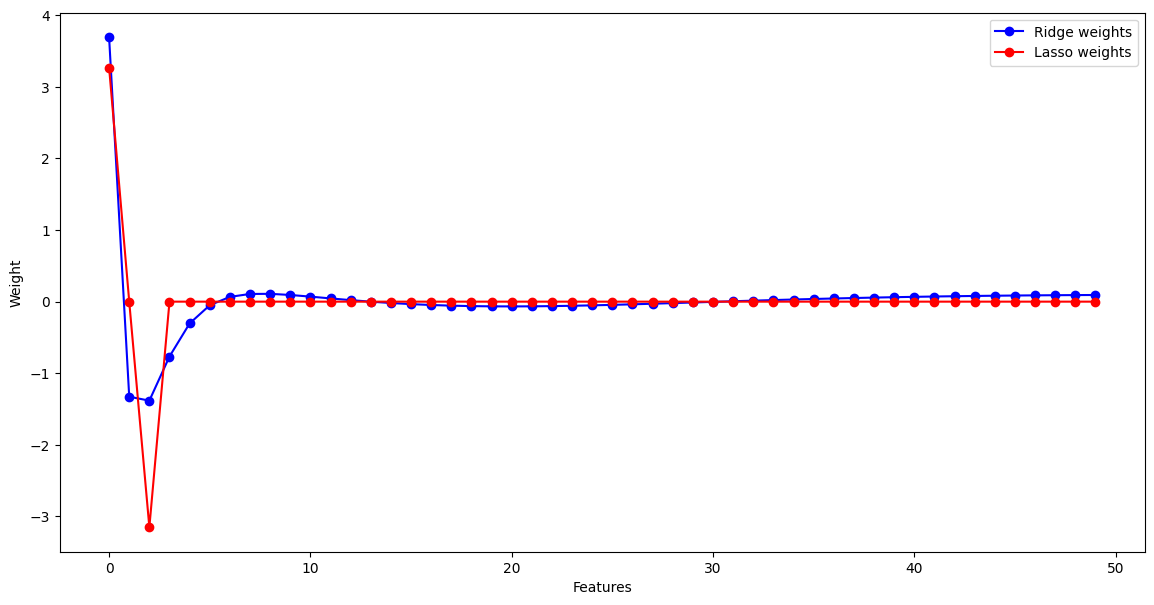

In [81]:
# comparing the weights from ridge and lasso regression
# Print out the weights
print("Weights from Ridge regression: ", optimal_weights_ridge)
print("Weights from Lasso regression: ", optimal_weights_lasso)

plt.figure(figsize=(14, 7))
plt.plot(optimal_weights_ridge, 'b', marker='o', label='Ridge weights')
print("\n")
plt.plot(optimal_weights_lasso, 'r', marker='o', label='Lasso weights')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.legend()
plt.show()

<span style = "color:green">The above plot indicates the weights plotted at the optimal lambda across the 50 features. This clearly illustrates that the Lasso regression turns most of the weights as 0, however the fluctuation in the graph for Ridge regression tells us that the weights are not zero, however is close to zero.</span>

## Reflection

Please reflect on the following:
- Observe the resulting error and l (lambda), and compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

Observe the resulting error and l (lambda), and compare these to previous results. What do you see? Is this what you expected?  
<span style = "color:green">The optimal lambda obtained for RidgeCV is 0.012012012013000001, this is different from when calculating the lambdas manually(0.009009009009009009). The value is of lambda is higher than the value obtained using the cross validation(0.002002002002002002). The Eout at optimal lambda/alpha is also different here, as the Eout value shows an increase to 0.8058579823983674 from 0.13730706495017247. This is a valid result as lambda decreases the Eout value increases. In a similar way, the optimal lambda for Lasso is 0.001001001002, and the optimal Eout is 0.8300006333426985.</span>  

<span style = "color:green">Something I observed when I provided the alpha values the results vary from the results when the alpha values are not provided. For Instance when the alpha values are not provided for the RidgeCV the optimal Lambda it finds is at 0.1. This seems like an overestimated value. I believe its because it prioritizes generalization by default and tries not to overfit, as higher value of alpha produces simpler models.</span>

Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?  
<span style = "color:green"> As illustrated above, a number of weights in the lasso regression are turned to 0, while the weights of the ridge regression are not set to zero, however, they are close to 0. The ridge regression is also known as L2 regression. The reason the weights becoming 0 in lasso regresison is that the ridge regression adds penalty to the error function using a squared value of coefficients associated with the prediction, which encourages smaller but non-zero coefficients. However, for lasso regression, the penalty term is applied using absolute value of the coefficients, this leads to the sparsity in the coefficients, thereby turning some of the weights to 0 value. This can be applied for feature selection as it would only take in the features that affect the prediction the most and disregard the rest. This is also called as L1 Regularization</span>

### Changes adopted from peer code

Initially, I had calculated the optimum lambda for task 2 from the Eout as it was in the provided code. However, by viewing Daniel Maguire's code I came to realize that we should introduce an validation data from the train data. This makes logical sense as we would not have the Eout at the time of training the model in real world scenario. This also helps avoid overfitting as I would not be looking at the test data, however gaining information from the validation data.